# 1) 데이터 로딩

In [1]:
import pandas as pd

raw_pubchem_df = pd.read_csv('data/Pubchem_ASK1.csv')
pubchem_df = raw_pubchem_df[['SMILES', 'Activity_Value']].dropna()
pubchem_df.rename(columns={'SMILES':'Smiles', 'Activity_Value':'IC50_nM'},inplace=True)
pubchem_df.head()

/var/folders/fx/bdj1bhw11037xfwjzgrx6vc80000gn/T/ipykernel_53897/2798824054.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_pubchem_df = pd.read_csv('data/Pubchem_ASK1.csv')


,Smiles,IC50_nM
0,CC1=CC(=C(C=C1S(=O)(=O)N)C(=O)NC2=CC=CC(=N2)C3...,0.00010
1,CCS(=O)(=O)NC1=CC(=C(C=C1)OC)C(=O)NC2=CC=CC(=N...,0.00032
2,CNC(=O)C1CCN(CC1)C2=CN=C(C=C2N3C=C(N=C3)C4CC4)...,0.00040
3,CC1=CC(=C(C=C1C(=O)N)C(=O)NC2=CC=CC(=N2)C3=NN=...,0.00042
4,CC12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=...,0.00069


In [2]:
pubchem_df.tail()

,Smiles,IC50_nM
1143,CC1=CC(=C2C(=C1)SC(=N2)N3C(C(=C(C3=O)O)C(=O)C4...,63.0
1144,CN1C=C(C2=CC=CC=C21)C=C3C4=CC=CC=C4NC3=O,82.7
1145,CN1C=C(C2=CC=CC=C21)C=C3C4=CC=CC=C4NC3=O,100.0
1146,CCN1C=C(N=C1)NC(=O)C2=CSC=N2,100.0
1147,CCN1C=C(N=C1)NC(=O)C2=COC=C2,500.0


In [ ]:
raw_chembl_df = pd.read_csv('data/ChEMBL_ASK1(IC50).csv', sep=';',low_memory=False)
chembl_df = raw_chembl_df[['Smiles','Value']].dropna()
chembl_df.rename(columns={'Value':'IC50_nM'},inplace=True)
chembl_df = chembl_df[chembl_df['IC50_nM'] > 0]

raw_chembl_df.to_csv('data/ChEMBL_ASK1(IC50)_.csv')

In [4]:
chembl_df

,Smiles,IC50_nM
0,Cn1cc(Cl)c2cnc(NC(=O)c3ccc([C@](C)(O)CO)cc3)cc21,38.000
1,Cc1cc2c(-c3ccc(S(=O)(=O)NCCN)s3)ccnc2[nH]1,0.251
2,Cc1cc(C)c2nc(N3C(=O)C(O)=C(C(=O)c4ccc(Cl)cc4)C...,6.300
3,Cc1ccc(C(=O)C2=C(O)C(=O)N(c3nc4ccc(F)cc4s3)C2c...,7.600
4,CCOc1ccc2nc(N3C(=O)C(O)=C(C(=O)c4ccccc4)C3c3cc...,4.200
...,...,...
819,O=C(Nc1nc2cc(C(F)(F)F)cc(NC3CC3)n2n1)c1cccnc1,131.000
820,O=C(Nc1cccc(-c2nncn2C2CC2)c1)c1cc(-n2cnc(C3CC3...,2.870
821,O=C(Nc1nc2cc(C(F)(F)F)cc(NC3CC3)n2n1)c1cccnc1,13.000
822,Cc1cc(F)c(C(=O)Nc2cccc(-c3nncn3C(C)C)n2)cc1-n1...,7501.000


# 2) 시각화 및 전처리

<Axes: >

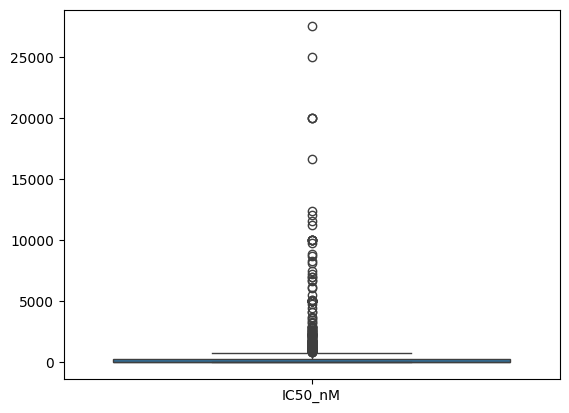

In [5]:
import seaborn as sns
sns.boxplot(chembl_df)

<Axes: ylabel='log_IC50'>

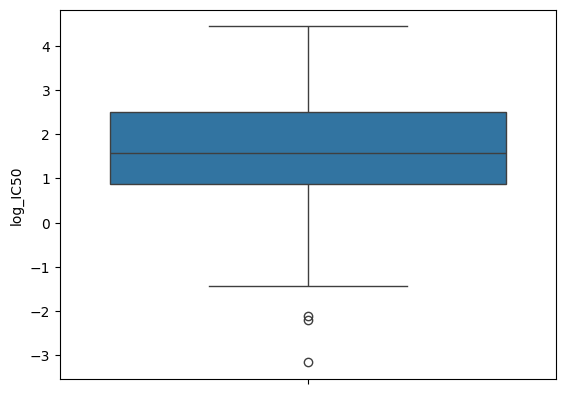

In [6]:
import numpy as np
chembl_df['log_IC50'] = np.log10(chembl_df['IC50_nM'])
sns.boxplot(y=chembl_df['log_IC50'])


<Axes: ylabel='log_IC50'>

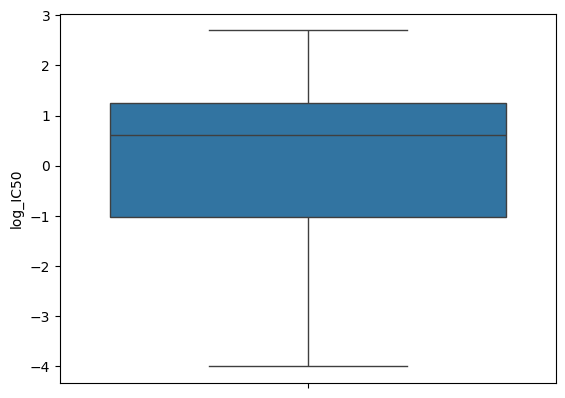

In [7]:
pubchem_df['log_IC50']= np.log10(pubchem_df['IC50_nM'])
sns.boxplot(y=pubchem_df['log_IC50'])

<Axes: xlabel='log_IC50', ylabel='Count'>

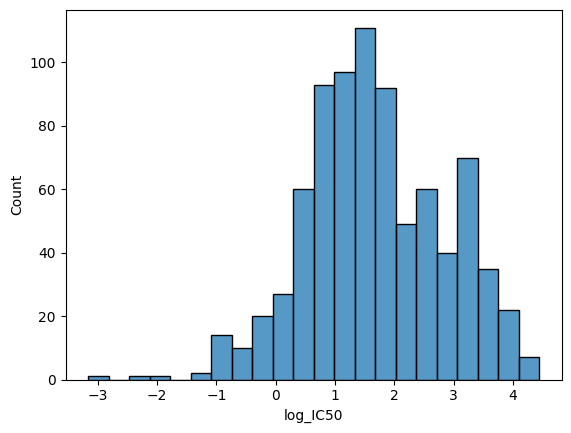

In [8]:
sns.histplot(chembl_df, x='log_IC50')

In [9]:
# def remove_iqr(df,columns):  
#     df_clean = df.copy()
#     for col in columns:
#         Q1 = df_clean[col].quantile(0.25)
#         Q3 = df_clean[col].quantile(0.75)
#         #중앙 50% 데이터가 얼만큼 퍼져 있는지를 나타내는 값
#         IQR = Q3-Q1
#         # 이상치 경계(lower/upper
#         lower = Q1 - 1.5*IQR
#         upper = Q3 + 1.5*IQR
#         df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
#     return df_clean 


# 3) 데이터 병합

In [10]:
pubchem_df["Smiles"] = pubchem_df["Smiles"].str.strip()
chembl_df["Smiles"] = chembl_df["Smiles"].str.strip()

train_df = pd.concat([pubchem_df,chembl_df],ignore_index=True)
train_df = train_df.drop_duplicates(subset='Smiles').reset_index(drop=True)

train_df

,Smiles,IC50_nM,log_IC50
0,CC1=CC(=C(C=C1S(=O)(=O)N)C(=O)NC2=CC=CC(=N2)C3...,0.00010,-4.000000
1,CCS(=O)(=O)NC1=CC(=C(C=C1)OC)C(=O)NC2=CC=CC(=N...,0.00032,-3.494850
2,CNC(=O)C1CCN(CC1)C2=CN=C(C=C2N3C=C(N=C3)C4CC4)...,0.00040,-3.397940
3,CC1=CC(=C(C=C1C(=O)N)C(=O)NC2=CC=CC(=N2)C3=NN=...,0.00042,-3.376751
4,CC12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=...,0.00069,-3.161151
...,...,...,...
1219,O=C(Nc1cccc(-c2nncn2C2CC2)n1)c1cc(-c2cnn(C(F)F...,290.89000,2.463729
1220,COC1NC(=O)c2c1c1c3ccccc3[nH]c1c1[nH]c3ccc(O)cc...,50.00000,1.698970
1221,CC(C)n1cnnc1-c1cccc(NC(=O)c2cc3c(C(F)(F)F)nn(C...,2660.00000,3.424882
1222,Clc1cccc(Nc2ncnc3[nH]cnc23)c1,10.00000,1.000000


# 4) 벡터화 시키기 
- Smiles를 분자 구조로 해석해서 Mol 형식으로 변경 
- Mol를 2048차원의 벡터로 변경 

In [11]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs
import numpy as np
from tqdm import tqdm

tqdm.pandas()
train_df['mol'] = train_df['Smiles'].progress_apply(Chem.MolFromSmiles)

100%|██████████| 1224/1224 [00:00<00:00, 12654.96it/s]


In [12]:
train_df.head()

,Smiles,IC50_nM,log_IC50,mol
0,CC1=CC(=C(C=C1S(=O)(=O)N)C(=O)NC2=CC=CC(=N2)C3...,0.00010,-4.000000,<rdkit.Chem.rdchem.Mol object at 0x1776fb920>
1,CCS(=O)(=O)NC1=CC(=C(C=C1)OC)C(=O)NC2=CC=CC(=N...,0.00032,-3.494850,<rdkit.Chem.rdchem.Mol object at 0x1776fbb50>
2,CNC(=O)C1CCN(CC1)C2=CN=C(C=C2N3C=C(N=C3)C4CC4)...,0.00040,-3.397940,<rdkit.Chem.rdchem.Mol object at 0x1776fbbc0>
3,CC1=CC(=C(C=C1C(=O)N)C(=O)NC2=CC=CC(=N2)C3=NN=...,0.00042,-3.376751,<rdkit.Chem.rdchem.Mol object at 0x1776fbc30>
4,CC12C(C(CC(O1)N3C4=CC=CC=C4C5=C6C(=C7C8=CC=CC=...,0.00069,-3.161151,<rdkit.Chem.rdchem.Mol object at 0x1776fbca0>


In [13]:
import matplotlib.pyplot as plt
counts, bins, _ = plt.hist(train_df["log_IC50"], bins=100)
plt.close()

for i, count in enumerate(counts):
    if count > 80:
        print(f"Bin {i}:{count} sample, Range:{bins[i]:.2f} ~ {bins[i+1]:.2f}")
    


Bin 59:90.0 sample, Range:0.98 ~ 1.06
Bin 62:109.0 sample, Range:1.23 ~ 1.32


In [14]:
to_remove = (
    train_df["log_IC50"].between(0.9, 1.4) |
    train_df["log_IC50"].between(-0.1, 0.4)  # 0 부근 피크도 제거
)

train_df = train_df[~to_remove].reset_index(drop=True)

In [15]:
from rdkit.Chem import Descriptors

def compute_descriptors(mol):
    return {
        'MolWt': Descriptors.MolWt(mol),
        'LogP': Descriptors.MolLogP(mol),
        'NumHDonors': Descriptors.NumHDonors(mol),
        'NumHAcceptors': Descriptors.NumHAcceptors(mol),
        'TPSA': Descriptors.TPSA(mol),
        'NumRotatableBonds': Descriptors.NumRotatableBonds(mol)
    }

desc_df = train_df['mol'].progress_apply(compute_descriptors).apply(pd.Series)


100%|██████████| 836/836 [00:00<00:00, 3776.85it/s]


In [16]:
# Fingerprint를 벡터로 변환하는 함수
def mol_to_fp(mol, n_bits=2048):
    arr = np.zeros((1,), dtype=int)
    if mol:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=n_bits)
        DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

In [17]:
X_fp = np.array([mol_to_fp(m) for m in tqdm(train_df['mol'])])
X_combined = np.concatenate([X_fp, desc_df.to_numpy()], axis=1)

X = X_combined
y = train_df["log_IC50"].values

100%|██████████| 836/836 [00:00<00:00, 19737.01it/s]


# 5) Train, Test 데이터 추출

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2
)

# 6) 모델 학습 및 평가

In [ ]:
import optuna

from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import cross_val_score



def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 5, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 10),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
    }


    model = RandomForestRegressor(**params, random_state=42, n_jobs=-1)
    score = cross_val_score(model, X_train, y_train, cv=2, scoring="r2").mean()
    return score

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)


best_params = study.best_trial.params
model = RandomForestRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)


[I 2025-08-16 01:45:42,828] A new study created in memory with name: no-name-bbb3b0bb-810b-4ec6-8ad6-3c35d31b127d
[I 2025-08-16 01:45:44,799] Trial 0 finished with value: 0.20569111712322546 and parameters: {'n_bits': 1024, 'n_estimators': 974, 'max_depth': 26, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 0 with value: 0.20569111712322546.
[I 2025-08-16 01:45:46,467] Trial 1 finished with value: 0.2315585450966462 and parameters: {'n_bits': 1024, 'n_estimators': 784, 'max_depth': 26, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 1 with value: 0.2315585450966462.
[I 2025-08-16 01:45:47,809] Trial 2 finished with value: 0.2691289386656802 and parameters: {'n_bits': 4096, 'n_estimators': 597, 'max_depth': 28, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.2691289386656802.
[I 2025-08-16 01:45:49,434] Trial 3 finished with value: 0.19457646170471848 and pa

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


print(f"mean_absolute_error: {mean_absolute_error(y_test, pred)}")
print(f"mean_squared_error: {mean_squared_error(y_test, pred)}")
print(f"r2_score: {r2_score(y_test, pred)}")

mean_absolute_error: 1.124472427042532
mean_squared_error: 2.0697075431168606
r2_score: 0.2575695982255831


In [ ]:
import numpy as np
import pandas as pd
from joblib import load

# 1) 불러오기: 전처리(피처 생성)까지 포함된 Pipeline이어야 함
model = load("model_r2_3333.pkl")   # 예: ColumnTransformer/Hashing/RDKit 포함 Pipeline

# 2) 데이터 읽기
test = pd.read_csv("data/test.csv")
sample = pd.read_csv("data/sample_submission.csv")

# 3) 예측 (학습 때 넣던 입력 형태 그대로 넣기)
#   - 학습 때 pipe.fit(X_train_df) 형태였다면 DataFrame 그대로
#   - 학습 때 pipe.fit(smiles_series) 였다면 test["Smiles"] 만 넣기
model_log = model.predict(test["Smiles"])  # 필요시 test["Smiles"]

# 4) 제출 포맷 맞추기 (샘플의 마지막 열을 타깃으로 가정)
target_col = sample.columns[-1]
# 대회가 IC50(nM) 제출이면 로그 → 원단위로 복원
if "IC50" in target_col.upper():
    pred_out = np.clip(np.power(10.0, model_log), 1e-6, None)
else:
    pred_out = model_log

sample[target_col] = pred_out
sample.to_csv("submission.csv", index=False)
print("Saved: submission.csv")

ValueError: could not convert string to float: 'CC(C)n1cnnc1c2cccc(n2)N3C=Cc4ccc(Br)cc4C3=O'

In [26]:
# submit_from_saved_model.py
import numpy as np
import pandas as pd
from joblib import load

# ====== 0) 네 환경에 맞게 설정 ======
MODEL_PATH = "model_r2_3333.pkl"   # 저장해둔 모델 파일명
FEATURE_MODE = "fp_desc"         # "fp_desc" | "desc" | "hashing"
N_BITS = 2048                    # Morgan FP 차원 (훈련과 동일)
RADIUS = 2                       # Morgan FP 반경 (훈련과 동일)
HASHING_PATH = "smiles_hashing_vectorizer.joblib"   # FEATURE_MODE="hashing"일 때만 사용

TEST_CSV = "data/test.csv"
SAMPLE_CSV = "data/sample_submission.csv"
OUT_CSV = "data/submission.csv"

# ====== 1) 데이터 읽기 ======
test = pd.read_csv(TEST_CSV, low_memory=False)
sample = pd.read_csv(SAMPLE_CSV, low_memory=False)

# Smiles 컬럼 이름 맞추기
if "Smiles" in test.columns:
    smiles = test["Smiles"].astype(str).str.strip()
elif "SMILES" in test.columns:
    smiles = test["SMILES"].astype(str).str.strip()
else:
    # 첫 번째 피처열이 Smiles라면 필요시 수정
    smiles = test.iloc[:, 1].astype(str).str.strip()

# ====== 2) 피처 생성 함수들 ======
def compute_descriptors_from_smiles(smiles_series):
    from rdkit import Chem
    from rdkit.Chem import Descriptors
    rows = []
    for s in smiles_series:
        m = Chem.MolFromSmiles(s)
        if m is None:
            rows.append({
                'MolWt': 0.0, 'LogP': 0.0, 'NumHDonors': 0, 'NumHAcceptors': 0,
                'TPSA': 0.0, 'NumRotatableBonds': 0
            })
            continue
        rows.append({
            'MolWt': Descriptors.MolWt(m),
            'LogP': Descriptors.MolLogP(m),
            'NumHDonors': Descriptors.NumHDonors(m),
            'NumHAcceptors': Descriptors.NumHAcceptors(m),
            'TPSA': Descriptors.TPSA(m),
            'NumRotatableBonds': Descriptors.NumRotatableBonds(m)
        })
    return pd.DataFrame(rows)

def morgan_fp_from_smiles(smiles_series, n_bits=2048, radius=2):
    from rdkit import Chem
    from rdkit.Chem import AllChem, DataStructs
    X = np.zeros((len(smiles_series), n_bits), dtype=np.uint8)
    for i, s in enumerate(smiles_series):
        m = Chem.MolFromSmiles(s)
        if m is None:
            continue
        fp = AllChem.GetMorganFingerprintAsBitVect(m, radius=radius, nBits=n_bits)
        arr = np.zeros((n_bits,), dtype=int)
        DataStructs.ConvertToNumpyArray(fp, arr)
        X[i] = arr
    return X

# ====== 3) 테스트 피처 구성 (훈련과 '동일하게') ======
if FEATURE_MODE == "fp_desc":
    # 훈련 때 X = [MorganFP, RDKit Descriptors]였다면
    X_fp = morgan_fp_from_smiles(smiles, n_bits=N_BITS, radius=RADIUS)
    X_desc = compute_descriptors_from_smiles(smiles).to_numpy(dtype=np.float32)
    X_test = np.concatenate([X_fp, X_desc], axis=1).astype(np.float32)

elif FEATURE_MODE == "desc":
    # 훈련 때 디스크립터만 썼다면
    X_test = compute_descriptors_from_smiles(smiles).to_numpy(dtype=np.float32)

elif FEATURE_MODE == "hashing":
    # 훈련 때 Hashing/Tfidf 벡터라이저를 썼고 따로 저장해 두었을 때
    hv = load(HASHING_PATH)   # 예: HashingVectorizer/TfidfVectorizer
    X_test = hv.transform(smiles).astype("float32")

else:
    raise ValueError("FEATURE_MODE must be one of {'fp_desc','desc','hashing'}")

# ====== 4) 모델 로드 & 차원 점검 ======
model = load(MODEL_PATH)

# scikit-learn 추정기면 보통 n_features_in_가 있음: 차원 확인(디버깅 도움)
n_model_feats = getattr(model, "n_features_in_", None)
if n_model_feats is not None and X_test.shape[1] != n_model_feats:
    raise ValueError(
        f"피처 차원 불일치: X_test has {X_test.shape[1]} cols, model expects {n_model_feats}. "
        f"FEATURE_MODE/N_BITS/RADIUS/피처 구성을 훈련과 동일하게 맞추세요."
    )

# ====== 5) 예측 & 제출 파일 ======
# 보통 log10(IC50_nM)로 학습했을 것이므로 pred_log라 가정
pred_log = model.predict(X_test)

target_col = sample.columns[-1]
# 샘플 타깃 명에 IC50이 들어있으면 원단위로 역변환
if "IC50" in target_col.upper():
    pred_out = np.clip(np.power(10.0, pred_log), 1e-6, None)
else:
    pred_out = pred_log

sample[target_col] = pred_out
sample.to_csv(OUT_CSV, index=False)
print(f"Saved: {OUT_CSV}")


Saved: data/submission.csv
